# Lista 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

## Zadanie 1
Rozpatrzymy klasyczny model regresji dany następującym wzorem:

$$ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\quad i=1,2,...,n$$

gdzie $\epsilon_i \; i=1,2,...,n$ są niezależnymi zmiennymi losowymi o rozkładzie $t$ Studenta z $\nu > 2$ stopniami swobody. Za pomocą symulacji Monte Carlo (przy różnych wielkościach $\nu$ i różnych wielkościach $n$) wyznacz empiryczne odpowiedniki dla wartości oczekiwanej i wariancji estymatorów $\hat{\beta_0}$ oraz $\hat{\beta_1}$ i porównaj je z wartościami teoretycznymi wyznaczonymi na wykładzie. Jak $\nu$ i $n$ wpływają na poprawność estymatorów? Te same analizy wykonaj przy założeniu rozkładu normalnego $\mathcal{N}(0, \sigma^2)$ zmiennych $\epsilon_i$. Tym razem sprawdź jak $\sigma$ oraz $n$ wpływają na poprawność estymatorów.

In [2]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

In [145]:
beta_0 = 5
beta_1 = 2
n = 1000
N = 5000
x = np.linspace(0,1,n)
v = np.arange(10,101,5)
sr_beta0 = np.zeros(len(v))
sr_beta1 = np.zeros(len(v))
var_beta0 = np.zeros(len(v))
var_beta1 = np.zeros(len(v))
# M_array = np.zeros(len(v))

for k in range(len(v)):
    beta0_array = np.zeros(N)
    beta1_array = np.zeros(N)
    # M = np.zeros(N)
    for i in range(N):
        epsilon = np.random.standard_t(v[k], size=n)
        # M[i] = np.var(epsilon)
        y = beta_0 + beta_1 * x + epsilon
        _beta1, _beta0 = poly_fit(x,y)
        beta0_array[i] = _beta0
        beta1_array[i] = _beta1

    # M_array[k] = np.mean(M)
    sr_beta0[k] = np.mean(beta0_array)
    sr_beta1[k] = np.mean(beta1_array)
    var_beta0[k] = np.var(beta0_array)
    var_beta1[k] = np.var(beta1_array)

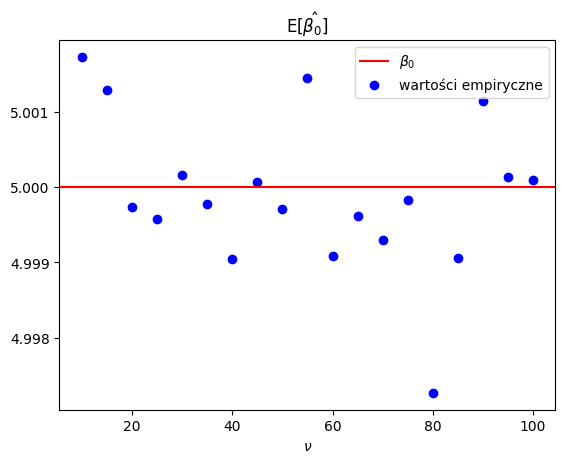

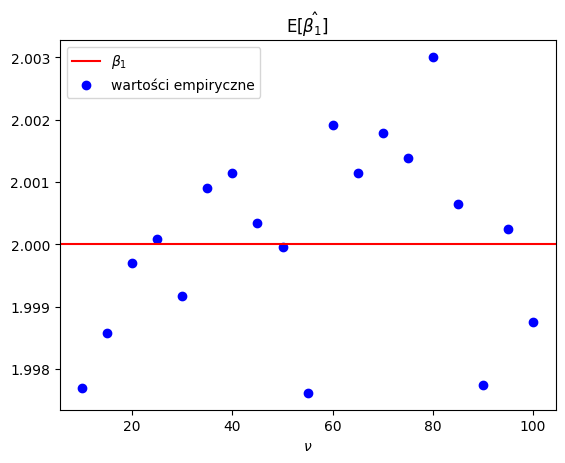

In [146]:
plt.axhline(beta_0, c='r', label=r'$\beta_0$')
plt.scatter(v, sr_beta0, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_0}$]')
plt.xlabel(r'$\nu$')
plt.show()

plt.axhline(beta_1, c='r', label=r'$\beta_1$')
plt.scatter(v, sr_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_1}$]')
plt.xlabel(r'$\nu$')
plt.show()

In [147]:
def var_beta(x,M):
    n = len(x)
    var_b0 = M * (1/n + np.mean(x)**2 / sum((x - np.mean(x))**2))
    var_b1 = M / sum((x - np.mean(x))**2)
    return var_b0, var_b1

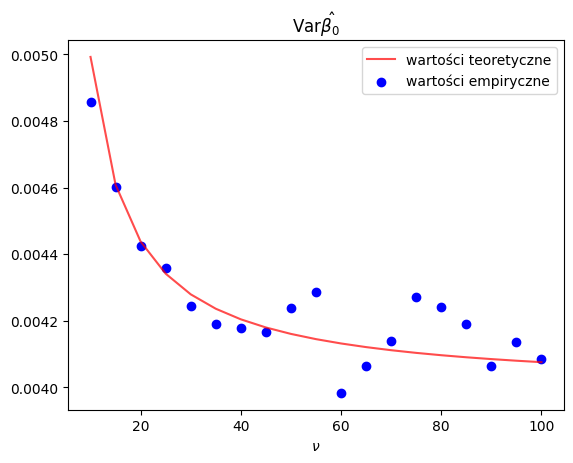

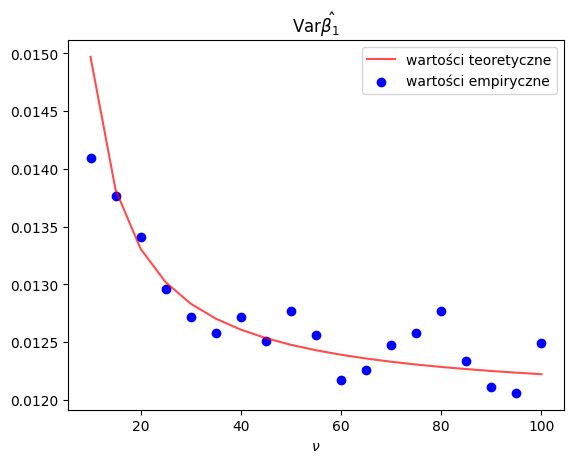

In [148]:
M = v / (v-2)
var_b0, var_b1 = var_beta(x, M)

plt.plot(v, var_b0, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(v, var_beta0, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_0}$')
plt.xlabel(r'$\nu$')
plt.show()

plt.plot(v, var_b1, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(v, var_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_1}$')
plt.xlabel(r'$\nu$')
plt.show()

In [157]:
v = 30
beta_1 = 2
beta_0 = 5
n = np.linspace(50,1001,50).astype(int)
N = 5000
sr_beta0 = np.zeros(len(n))
sr_beta1 = np.zeros(len(n))
var_beta0 = np.zeros(len(n))        # empiryczne
var_beta1 = np.zeros(len(n))        # empiryczne
var_b0_array = np.zeros(len(n))     # teoretyczne
var_b1_array = np.zeros(len(n))     # teoretyczne

for k in range(len(n)):
    beta0_array = np.zeros(N)
    beta1_array = np.zeros(N)
    for i in range(N):
        x = np.linspace(0,1,n[k])
        epsilon = np.random.standard_t(v, size=n[k])
        y = beta_0 + beta_1 * x + epsilon
        _beta1, _beta0 = poly_fit(x,y)
        beta0_array[i] = _beta0
        beta1_array[i] = _beta1

    var_b0_array[k] = v/(v-2) * (1/n[k] + np.mean(x)**2 / sum((x - np.mean(x))**2))
    var_b1_array[k] = v/(v-2) / sum((x - np.mean(x))**2)
    sr_beta0[k] = np.mean(beta0_array)
    sr_beta1[k] = np.mean(beta1_array)
    var_beta0[k] = np.var(beta0_array)
    var_beta1[k] = np.var(beta1_array)


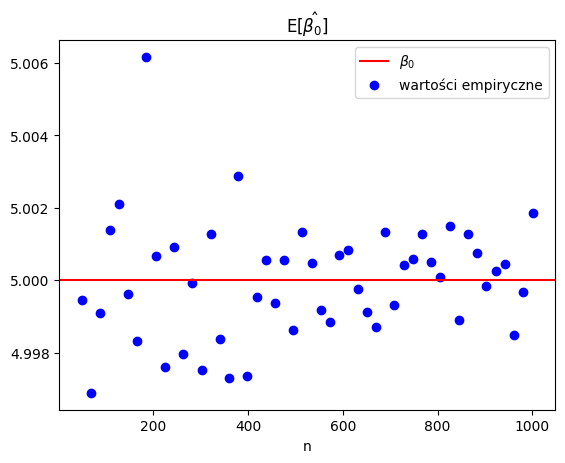

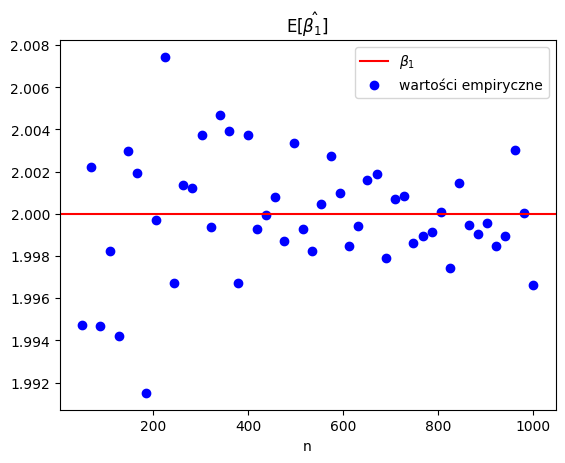

In [158]:
plt.axhline(beta_0, c='r', label=r'$\beta_0$')
plt.scatter(n, sr_beta0, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_0}$]')
plt.xlabel('n')
plt.show()

plt.axhline(beta_1, c='r', label=r'$\beta_1$')
plt.scatter(n, sr_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_1}$]')
plt.xlabel('n')
plt.show()

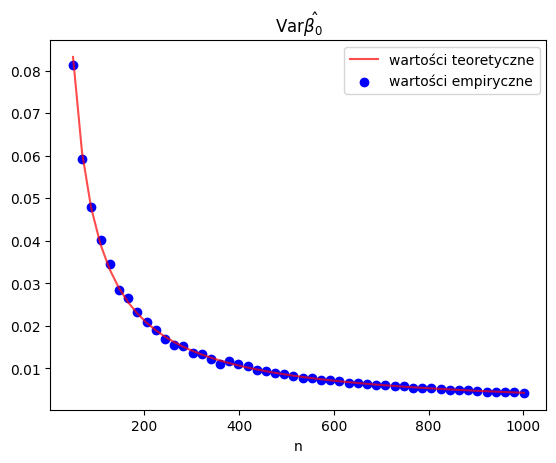

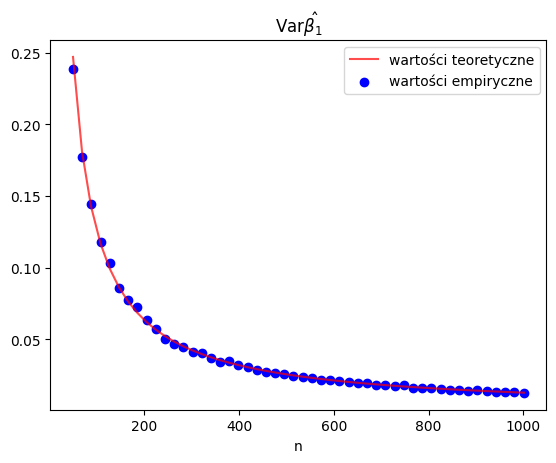

In [160]:
plt.plot(n, var_b0_array, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(n, var_beta0, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_0}$')
plt.xlabel('n')
plt.show()

plt.plot(n, var_b1_array, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(n, var_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_1}$')
plt.xlabel('n')
plt.show()

## Zadanie 2
Rozpatrzymy model regresji dany następującym wzorem:

$$ Y_i = \beta_1 x_i + \epsilon_i,\quad i=1,2,...,n $$

gdzie $\epsilon_i \; i=1,2,...,n$ są niezależnymi błędami o rozkładzie $\mathcal{N}(0, \sigma)$.

a) Wyznacz postać estymatora $\hat{\beta_1}$ współczynnika kierunkowego metodą najmniejszych kwadratów.

b) Sprawdź czy wyznaczony estymator jest estymatorem nieobciążonym parametru $\beta_1$.

c) Wyznacz wariancję estymatora.

d) Sprawdź, czy estymator MNK ma taką samą postać jak estymator wyznaczony metodą największej wiarygodności.

e) Za pomocą symulacji Monte Carlo (przy różnych wielkościach $\sigma$ i różnych wielkościach $n$) wyznacz empiryczne odpowiedniki dla wartości oczekiwanej i wariancji estymatora $\hat{\beta_1}$. Jak $\sigma$ i $n$ wpływają na poprawność estymatora?

### e)

In [8]:
beta_1 = 5
sigma = np.arange(1, 31, 1)
n = 1000
N = 5000
x = np.linspace(0,1,n)
sr_beta1 = np.zeros(len(sigma))
var_beta1 = np.zeros(len(sigma))

for k in range(len(sigma)):
    beta1_array = np.zeros(N)
    for i in range(N):
        epsilon = np.random.normal(0, sigma[k], size=n)
        y = beta_1 * x + epsilon
        beta1_array[i] = sum(x * y) / sum(x**2)

    sr_beta1[k] = np.mean(beta1_array)
    var_beta1[k] = np.var(beta1_array)

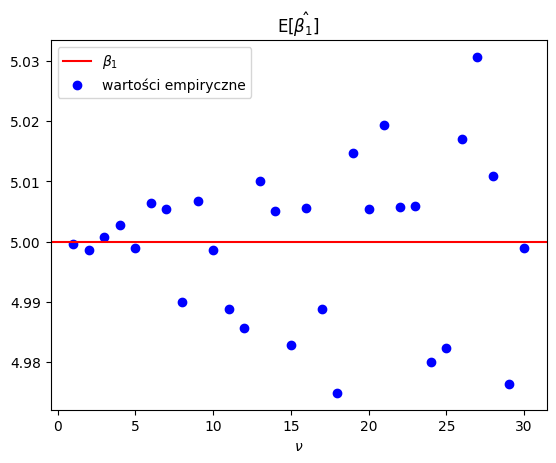

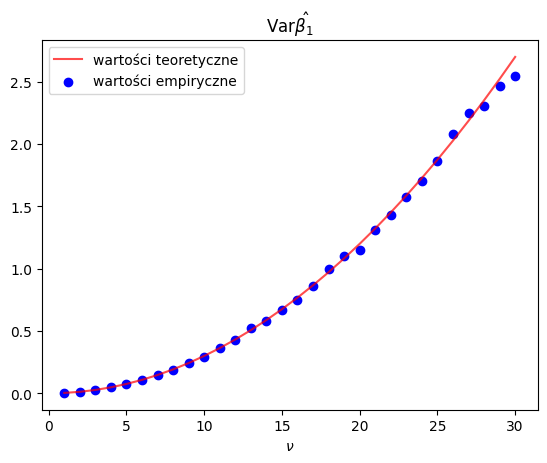

In [11]:
plt.axhline(beta_1, c='r', label=r'$\beta_1$')
plt.scatter(sigma, sr_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_1}$]')
plt.xlabel(r'$\nu$')
plt.show()

var_b1 = sigma**2 / sum(x**2)
plt.plot(sigma, var_b1, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(sigma, var_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_1}$')
plt.xlabel(r'$\nu$')
plt.show()

In [12]:
beta_1 = 5
sigma = 3
n = np.arange(50,1001,50)
N = 5000
sr_beta1 = np.zeros(len(n))
var_beta1 = np.zeros(len(n))        # empiryczne
var_b1_array = np.zeros(len(n))     # teoretyczne

for k in range(len(n)):
    beta1_array = np.zeros(N)
    for i in range(N):
        x = np.linspace(0,1,n[k])
        epsilon = np.random.normal(0, sigma, size=n[k])
        y = beta_1 * x + epsilon
        beta1_array[i] = sum(x * y) / sum(x**2)

    var_b1_array[k] = sigma**2 / sum(x**2)
    sr_beta1[k] = np.mean(beta1_array)
    var_beta1[k] = np.var(beta1_array)


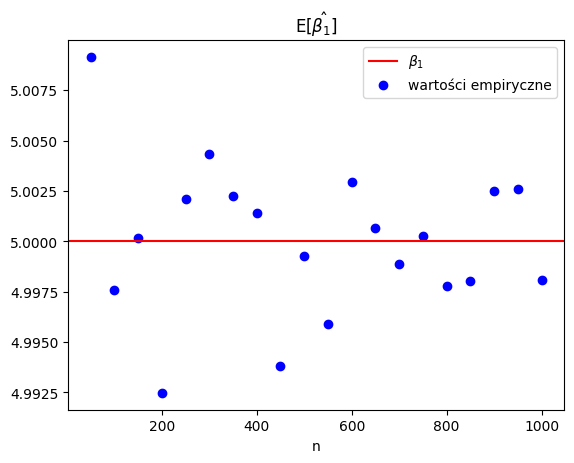

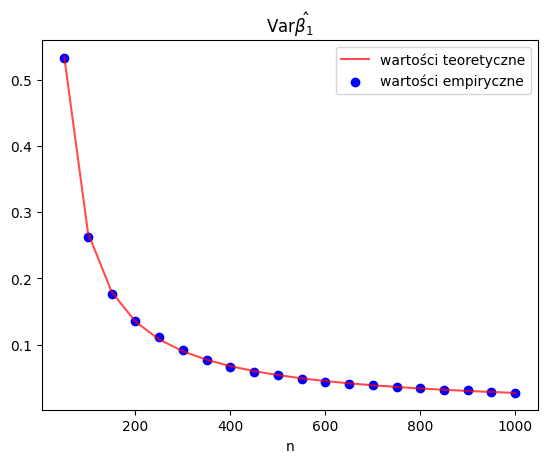

In [17]:
plt.axhline(beta_1, c='r', label=r'$\beta_1$')
plt.scatter(n, sr_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'E[$\hat{\beta_1}$]')
plt.xlabel('n')
plt.show()

plt.plot(n, var_b1_array, c='r', alpha=0.7, label='wartości teoretyczne')
plt.scatter(n, var_beta1, c='b', label='wartości empiryczne')
plt.legend()
plt.title(r'Var$\hat{\beta_1}$')
plt.xlabel('n')
plt.show()

## Zadanie 3
W modelu regresji

$$ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\quad i=1,2,...,n $$

gdzie $\epsilon_i \; i=1,2,...,n$ są niezależnymi zmiennymi losowymi $\mathcal{N}(0, \sigma)$, za pomocą metody Monte Carlo sprawdź rozkład estymatorów $\hat{\beta_0}$ oraz $\hat{\beta_1}$ i porównaj go z rozkładem teoretycznym przy ustalonej wielkości $\sigma$.

In [113]:
n = 1000
N = 1000
x = np.linspace(0,1,n)
beta_0 = 2
beta_1 = 5
sigma = 2
beta0_array = np.zeros(n)
beta1_array = np.zeros(n)

for i in range(N):
    epsilon = np.random.normal(0, sigma, size=n)
    y = beta_0 + beta_1 * x + epsilon
    _beta1, _beta0 = poly_fit(x,y)
    beta0_array[i] = _beta0
    beta1_array[i] = _beta1

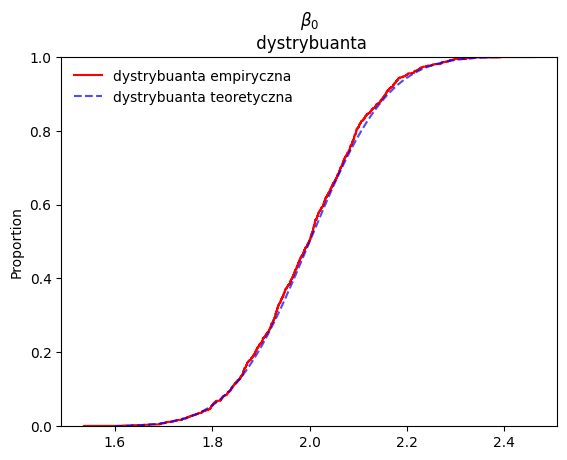

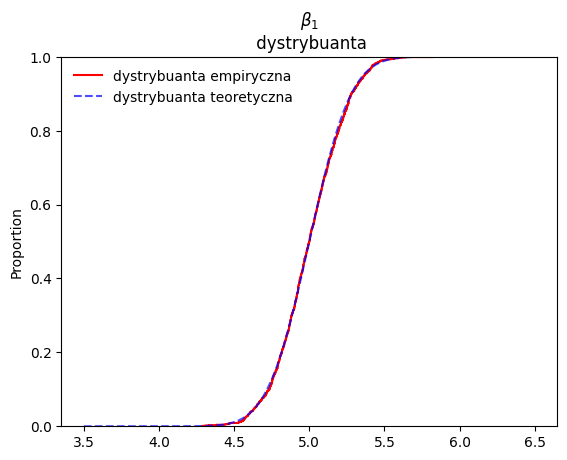

In [125]:
x1 = np.linspace(1.6, 2.4, n)
x2 = np.linspace(3.5, 6.5, n)
beta1_teo = scipy.stats.norm.cdf(x2, beta_1, np.sqrt(sigma**2 / sum((x - np.mean(x))**2)))
beta0_teo = scipy.stats.norm.cdf(x1, beta_0, np.sqrt(sigma**2 * ( 1/n + (np.mean(x))**2 / sum((x - np.mean(x))**2))))

sb.ecdfplot(beta0_array, c='r', label='dystrybuanta empiryczna')
plt.plot(x1, beta0_teo, c='b', alpha=0.7, linestyle='--', label='dystrybuanta teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$\beta_0$' + '\n dystrybuanta')
plt.show()

sb.ecdfplot(beta1_array, c='r', label='dystrybuanta empiryczna')
plt.plot(x2, beta1_teo, c='b', alpha=0.7, linestyle='--', label='dystrybuanta teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$\beta_1$' + '\n dystrybuanta')
plt.show()

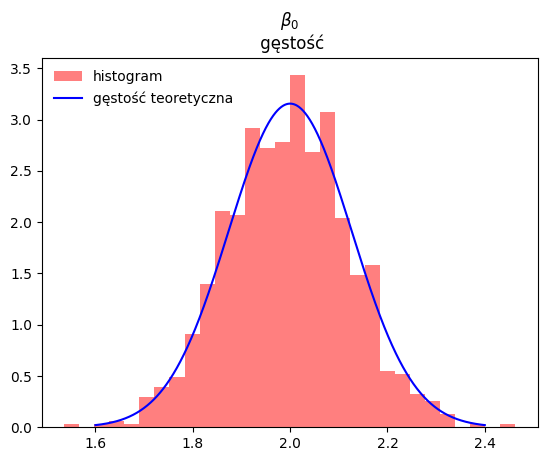

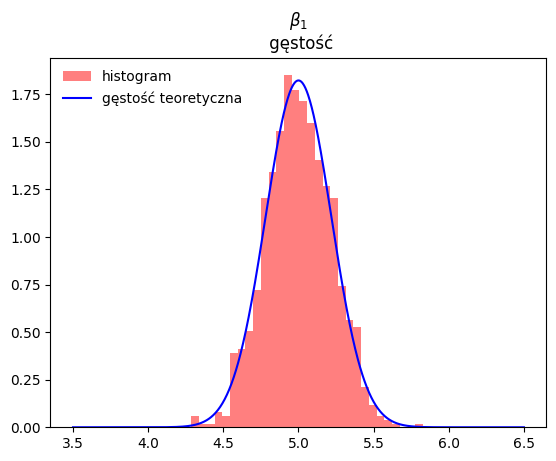

In [119]:
beta1_teo_ = scipy.stats.norm.pdf(x2, beta_1, np.sqrt(sigma**2 / sum((x - np.mean(x))**2)))
beta0_teo_ = scipy.stats.norm.pdf(x1, beta_0, np.sqrt(sigma**2 * ( 1/n + (np.mean(x))**2 / sum((x - np.mean(x))**2))))


plt.hist(beta0_array, density=True, bins=30, color='r', alpha=0.5, label='histogram')
plt.plot(x1, beta0_teo_, c='b', label='gęstość teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$\beta_0$' + '\n gęstość')
plt.show()

plt.hist(beta1_array, density=True, bins=30, color='r', alpha=0.5, label='histogram')
plt.plot(x2, beta1_teo_, c='b', label='gęstość teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$\beta_1$' + '\n gęstość')
plt.show()

## Zadanie 4
Wykorzystując tą samą metodę co w poprzednim zadaniu, sprawdź rozkłady studentyzowanych estymatorów $\hat{\beta_0}$ oraz $\hat{\beta_1}$ i porównaj je z rozkładami teoretycznymi.

In [25]:
n = 1000
N = 1000
x = np.linspace(0,1,n)
beta_0 = 2
beta_1 = 5
sigma = 2
W_0_array = np.zeros(n)
W_1_array = np.zeros(n)

for i in range(N):
    epsilon = np.random.normal(0, sigma, size=n)
    y = beta_0 + beta_1 * x + epsilon
    _beta1, _beta0 = poly_fit(x,y)
    _y = _beta0 + _beta1 * x
    s2 = 1/(n-2) * sum((_y - y)**2)
    SE_beta0 = np.sqrt(s2 * (np.mean(x)**2 / sum((x - np.mean(x))**2) + 1/n))
    SE_beta1 = np.sqrt(s2 / sum((x - np.mean(x))**2))
    W_0 = (_beta0 - beta_0) / SE_beta0
    W_1 = (_beta1 - beta_1) / SE_beta1
    W_0_array[i] = W_0
    W_1_array[i] = W_1

    

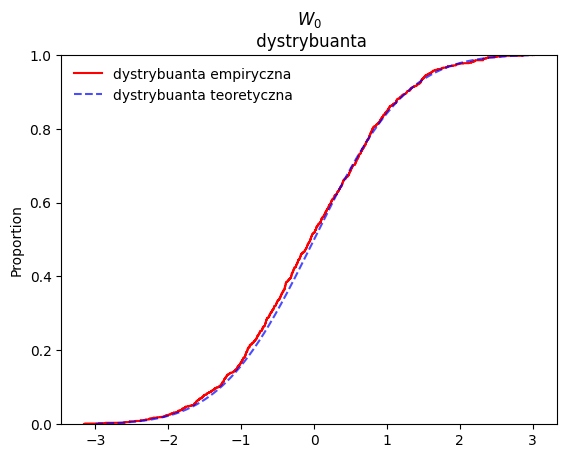

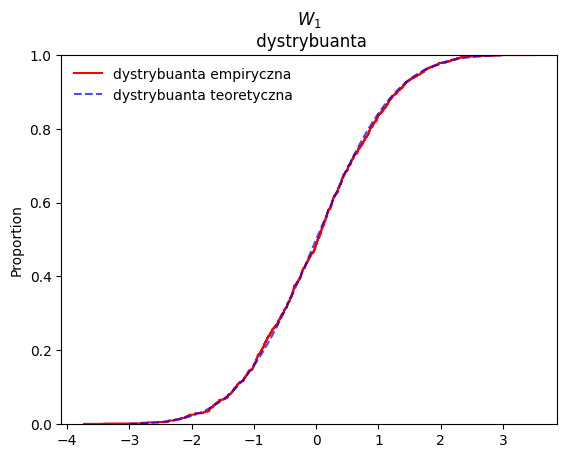

In [26]:
x1 = np.linspace(-3, 3, n)
x2 = np.linspace(-3, 3, n)
W_1_teo = scipy.stats.t.cdf(x2, n-2)
W_0_teo = scipy.stats.t.cdf(x1, n-2)

sb.ecdfplot(W_0_array, c='r', label='dystrybuanta empiryczna')
plt.plot(x1, W_0_teo, c='b', alpha=0.7, linestyle='--', label='dystrybuanta teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$W_0$' + '\n dystrybuanta')
plt.show()

sb.ecdfplot(W_1_array, c='r', label='dystrybuanta empiryczna')
plt.plot(x2, W_1_teo, c='b', alpha=0.7, linestyle='--', label='dystrybuanta teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$W_1$' + '\n dystrybuanta')
plt.show()

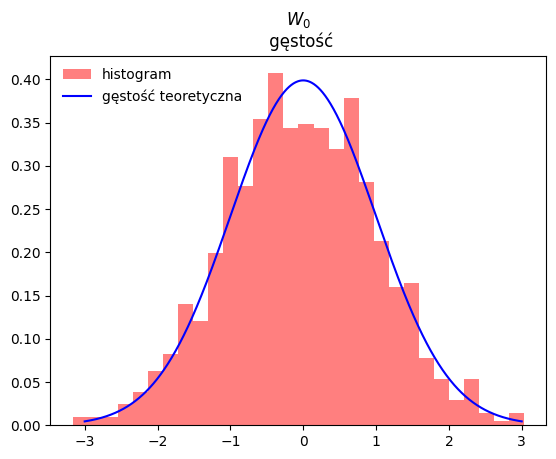

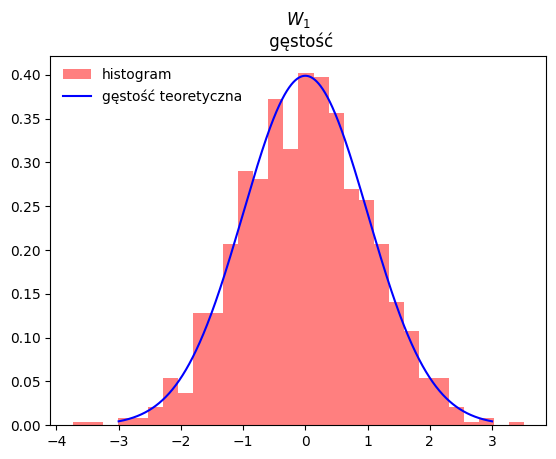

In [27]:
W_1_teo_ = scipy.stats.t.pdf(x2, n-2)
W_0_teo_ = scipy.stats.t.pdf(x1, n-2)


plt.hist(W_0_array, density=True, bins=30, color='r', alpha=0.5, label='histogram')
plt.plot(x1, W_0_teo_, c='b', label='gęstość teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$W_0$' + '\n gęstość')
plt.show()

plt.hist(W_1_array, density=True, bins=30, color='r', alpha=0.5, label='histogram')
plt.plot(x2, W_1_teo_, c='b', label='gęstość teoretyczna')
plt.legend(loc='upper left', frameon=False)
plt.title(r'$W_1$' + '\n gęstość')
plt.show()

## Zadanie 5
Dla danych wysymulowanych zastosuj metodę znajdowania punktu zmiany reżimu opisaną w pracy: Gajda Janusz, Sikora Grzegorz, Wyłomańska Agnieszka: Regime variance testing - a quantile approach, Acta Phys. Polon B 44(5), 1015-1035, 2013.
Sprawdź poprawność metody wykorzystując symulacje Monte Carlo.

In [67]:
n = 1000
M = 10

def x_func(sigma1, sigma2, n):
    x = np.zeros(n)
    for i in range(400):
        x[i] = np.random.normal(0, sigma1)
    for i in range(400,n):
        x[i] = np.random.normal(0, sigma2)
    return x


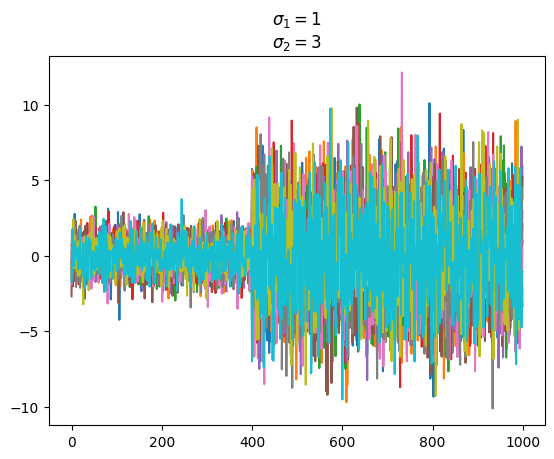

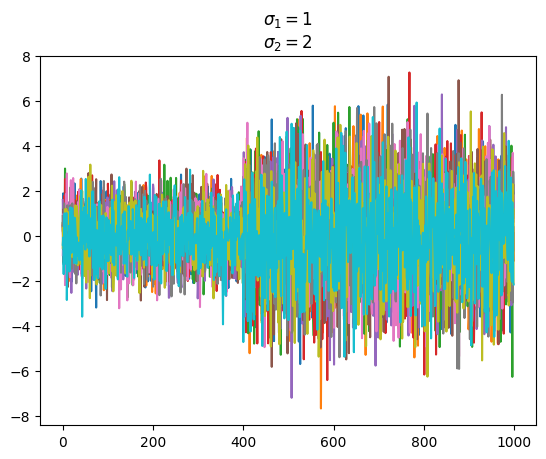

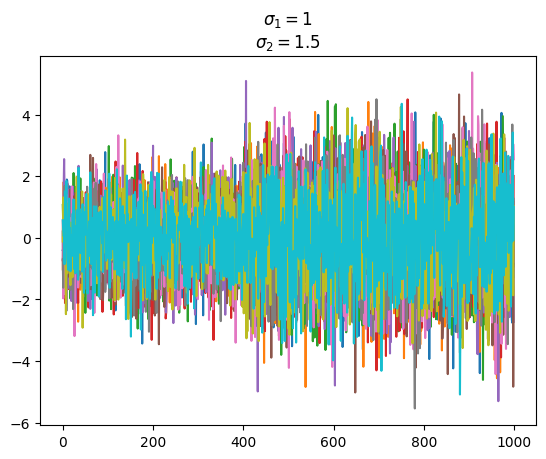

In [71]:
sigma1 = 1
sigma2 = 3
for i in range(M):
    plt.plot(x_func(sigma1, sigma2, n))
plt.title(r'$\sigma_1 = $' + f'{sigma1}\n' + r'$\sigma_2 = $' + f'{sigma2}')
plt.show()

sigma1_ = 1
sigma2_ = 2
for i in range(M):
    plt.plot(x_func(sigma1_, sigma2_, n))
plt.title(r'$\sigma_1 = $' + f'{sigma1_}\n' + r'$\sigma_2 = $' + f'{sigma2_}')
plt.show()

sigma_1 = 1
sigma_2 = 1.5
for i in range(M):
    plt.plot(x_func(sigma_1, sigma_2, n))
plt.title(r'$\sigma_1 = $' + f'{sigma_1}\n' + r'$\sigma_2 = $' + f'{sigma_2}')
plt.show()

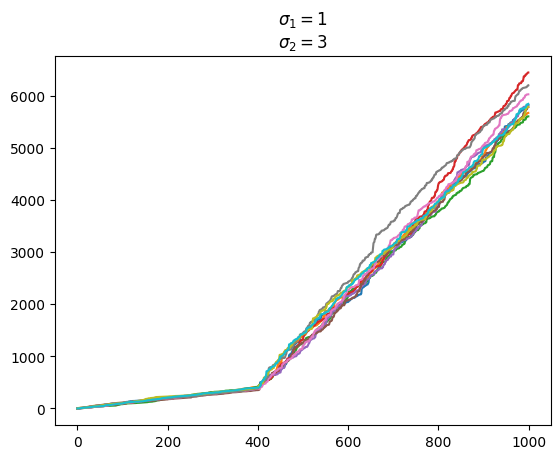

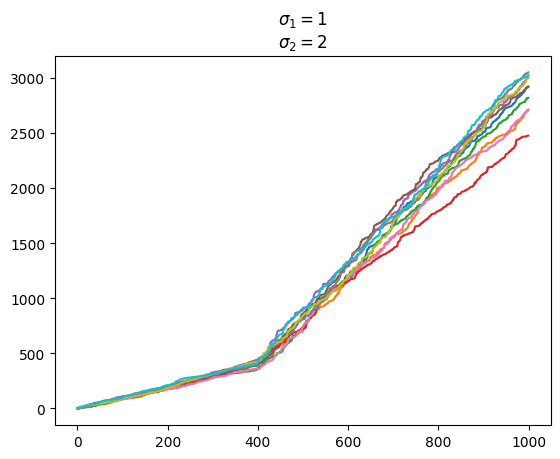

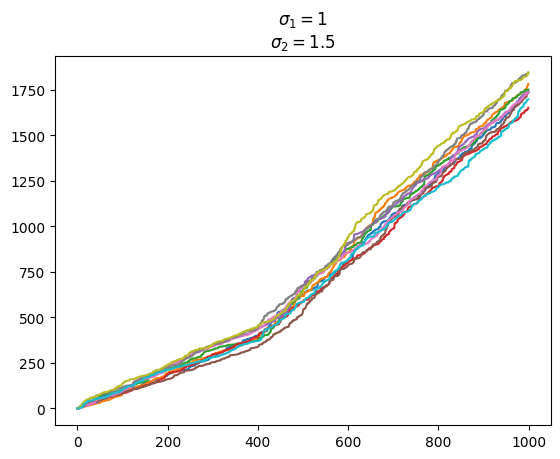

In [70]:
sigma1 = 1
sigma2 = 3
for i in range(M):
    Cj = np.cumsum(x_func(sigma1, sigma2, n)**2)
    plt.plot(Cj)
plt.title(r'$\sigma_1 = $' + f'{sigma1}\n' + r'$\sigma_2 = $' + f'{sigma2}')
plt.show()

sigma1_ = 1
sigma2_ = 2
for i in range(M):
    Cj = np.cumsum(x_func(sigma1_, sigma2_, n)**2)
    plt.plot(Cj)
plt.title(r'$\sigma_1 = $' + f'{sigma1_}\n' + r'$\sigma_2 = $' + f'{sigma2_}')
plt.show()

sigma_1 = 1
sigma_2 = 1.5
for i in range(M):
    Cj = np.cumsum(x_func(sigma_1, sigma_2, n)**2)
    plt.plot(Cj)
plt.title(r'$\sigma_1 = $' + f'{sigma_1}\n' + r'$\sigma_2 = $' + f'{sigma_2}')
plt.show()

In [3]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

def x_func(k, sigma1, sigma2, n):
    x = np.zeros(n)
    for i in range(k):
        x[i] = np.random.normal(0, sigma1)
    for i in range(k,n):
        x[i] = np.random.normal(0, sigma2)
    return x

def func(x,a,b):
    return a*x + b

def regime_change(X):
    k_ = np.arange(2, n-2 + 1, 1)
    B_k_array = np.empty(np.size(k_))

    for i, j in enumerate(k_):
        Cj = np.cumsum(X**2)
        js = np.arange(1, n+1, 1)
        
        a1, b1 = poly_fit(Cj[:j], js[:j])
        a2, b2 = poly_fit(Cj[j:], js[j:])
        
        _y1 = func(js[:j], a1, b1)
        _y2 = func(js[j:], a2, b2)

        B_k = np.sum((Cj[:j] - _y1)**2) + np.sum((Cj[j:] - _y2)**2)
        B_k_array[i] = B_k
    
    return np.argmin(B_k_array)
    

In [54]:
i = 50
n = 1000
k = 400
sigma1 = 1
sigma2 = 3
sigma = [5, 4, 3, 2, 1.5]
results = []

for s in sigma:
    regimes = np.zeros(i)
    for j in range(i):
        X = x_func(k, sigma1, s, n)
        regimes[j] = regime_change(X)
    results.append(regimes)
print(results)

[array([481., 418., 379., 434., 435., 525., 392., 442., 394., 547., 444.,
       544., 391., 389., 472., 519., 441., 611., 595., 397., 462., 442.,
       459., 396., 402., 406., 385., 422., 588., 395., 384., 461., 379.,
       464., 385., 474., 473., 496., 389., 371., 599., 465., 551., 384.,
       465., 383., 440., 435., 434., 546.]), array([384., 393., 482., 392., 427., 375., 385., 427., 460., 395., 379.,
       463., 392., 406., 394., 446., 392., 395., 482., 641., 478., 374.,
       390., 545., 386., 494., 435., 511., 428., 377., 442., 389., 503.,
       547., 382., 462., 383., 376., 385., 380., 391., 491., 397., 455.,
       377., 432., 407., 390., 396., 397.]), array([427., 560., 395., 457., 377., 499., 387., 456., 379., 371., 521.,
       592., 386., 553., 434., 485., 423., 387., 479., 376., 494., 443.,
       416., 388., 653., 376., 486., 388., 540., 425., 394., 384., 497.,
       530., 593., 396., 397., 409., 439., 510., 388., 385., 437., 505.,
       371., 513., 474., 382., 39

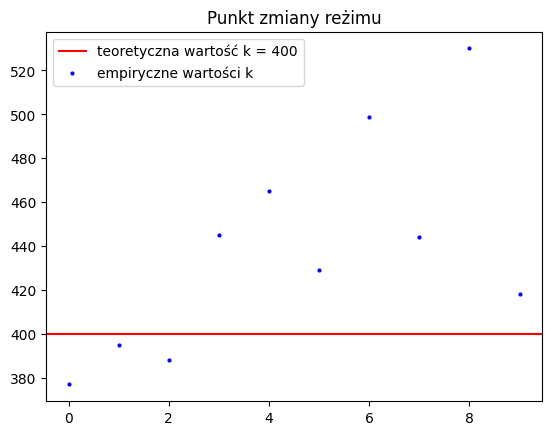

In [29]:
plt.axhline(k, c='r', label=f'teoretyczna wartość k = {k}')
plt.scatter(np.arange(i), regimes, s=4, c='b', label='empiryczne wartości k')
plt.legend()
plt.title('Punkt zmiany reżimu')
plt.show()

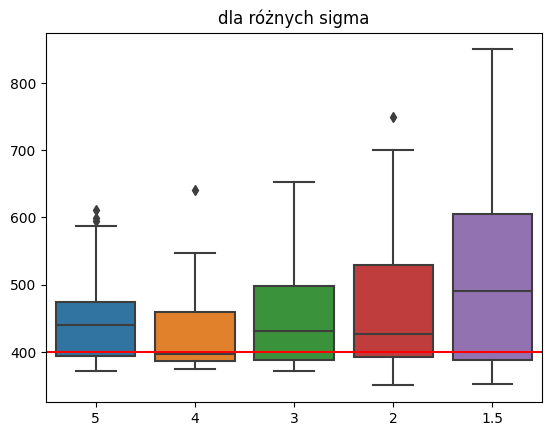

In [64]:
sb.boxplot(results)
plt.xticks([0, 1, 2, 3, 4], sigma)
plt.axhline(k, c='r')
plt.title('dla różnych sigma')
plt.show()